In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')

df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

c:\Users\Owner\anaconda3\envs\python_new\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# narrowing the job title to only data analyst
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

### PIE CHART FOR THE JOB WORK FROM HOME

In [18]:
# getting the value count of the job_work_from home column
work_from_home = df_DA['job_work_from_home'].value_counts()
work_from_home

job_work_from_home
False    182749
True      13326
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x21df3a76490>,
 [Text(-0.2330854938889049, -1.0750214660826851, 'False'),
  Text(0.23308546872621183, 1.0750214715384445, 'True')],
 [Text(-0.12713754212122083, -0.58637534513601, '93.2%'),
  Text(0.12713752839611553, 0.5863753481118787, '6.8%')])

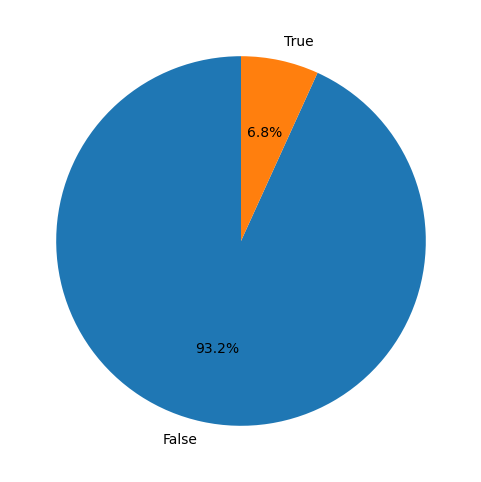

In [19]:
#plotting our results into a pie chart
plt.figure(figsize=(6,6))
plt.pie(work_from_home, labels=['False', 'True'], autopct='%1.1f%%', startangle=90)

### Creating pie charts for other boolean columns - job_no_degree mention and job_health_insurance

In [23]:
job_no_degree = df_DA['job_no_degree_mention'].value_counts()
job_no_health_insurance = df_DA['job_health_insurance'].value_counts()
job_no_degree
#job_no_health_insurance

job_no_degree_mention
False    120243
True      75832
Name: count, dtype: int64

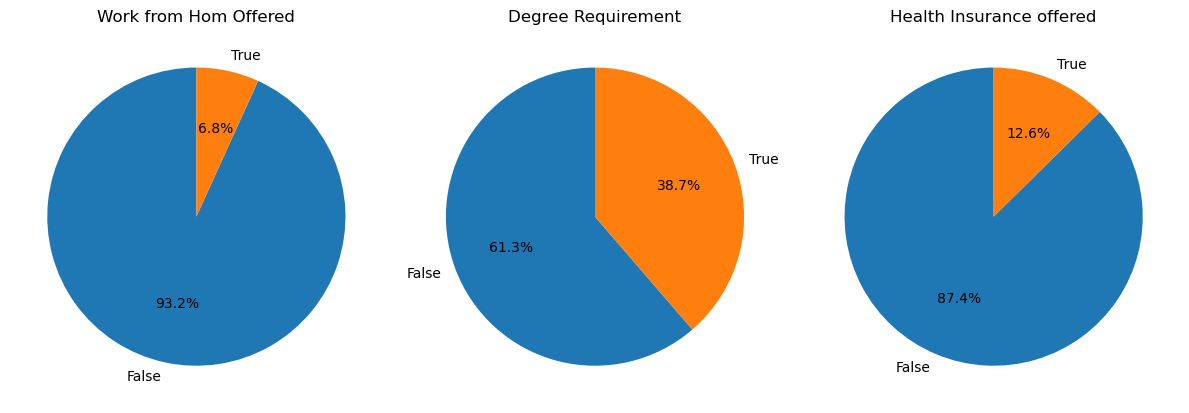

In [30]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches((12, 5))

#work_from home 
plt.subplot(1,3,1)
plt.pie(work_from_home, labels=[False, True], autopct='%1.1f%%', startangle=90)
plt.title('Work from Hom Offered')


#work_from home 
plt.subplot(1,3,2)
plt.pie(job_no_degree, labels=[False, True], autopct='%1.1f%%', startangle=90)
plt.title('Degree Requirement')

#work_from home 
plt.subplot(1,3,3)
plt.pie(job_no_health_insurance, labels=[False, True], autopct='%1.1f%%', startangle=90)
plt.title('Health Insurance offered')


plt.tight_layout()
plt.show()

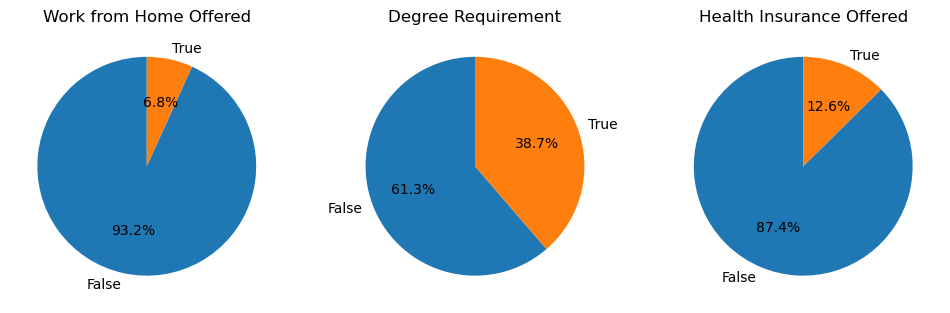

In [35]:
# Using a for loop for the above 

# rewrite the above with a for loop
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()